Вычислительное Д/З по случайным процессам № 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm
import random



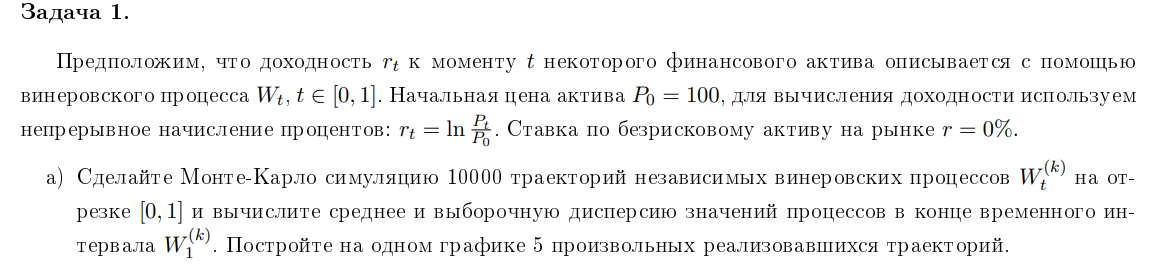

Среднее значение доходности r_t в конце интервала: 0.0001256589443382282
Дисперсия доходности r_t в конце интервала: 0.9876145225713601


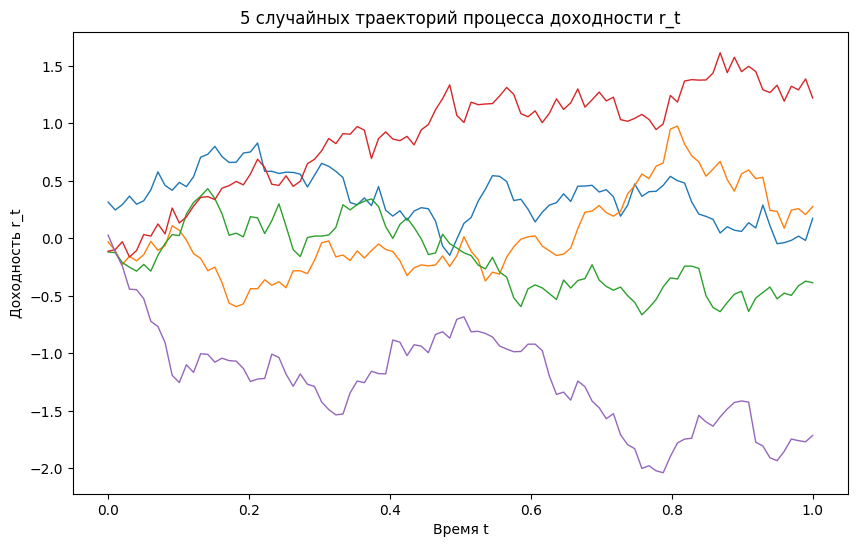

In [3116]:
# Параметры задачи
P0 = 100  # Начальная цена актива
r = 0.0   # Ставка по безрисковому активу
T = 1.0   # Временной интервал
num_steps = 100  # Количество шагов
num_simulations = 10000  # Количество симуляций
dt = T / num_steps

# Генерация траекторий винеровского процесса
dW = np.sqrt(dt) * np.random.randn(num_simulations, num_steps)
W = np.cumsum(dW, axis=1)  # Винеровский процесс

# Доходность как функция винеровского процесса
r_t = W[:, -1]

# Среднее и дисперсия доходности в конце временного интервала
mean_r_t = np.mean(r_t)
var_r_t = np.var(r_t)

print("Среднее значение доходности r_t в конце интервала:", mean_r_t)
print("Дисперсия доходности r_t в конце интервала:", var_r_t)

# Построение графика 5 случайных траекторий
plt.figure(figsize=(10, 6))
for i in np.random.choice(range(num_simulations), size=5, replace=False):
    plt.plot(np.linspace(0, T, num_steps), W[i], lw=1)
plt.title("5 случайных траекторий процесса доходности r_t")
plt.xlabel("Время t")
plt.ylabel("Доходность r_t")
plt.show()


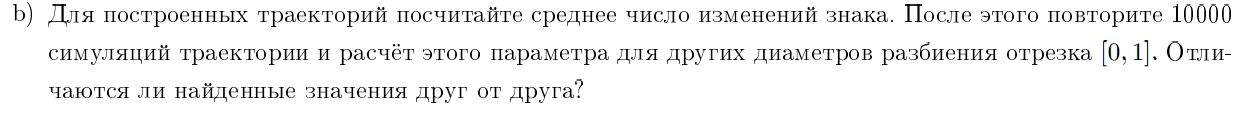

In [3117]:
# Функция для подсчета числа изменений знака в траектории
def count_sign_changes(trajectory):
    return np.sum(np.diff(np.sign(trajectory)) != 0)

# Шаги разбиения
step_sizes = [10, 50, 100, 500, 1000]  
sign_changes_results = []

# Расчет среднего числа изменений знака для каждой траектории с шагами 10, 50, 100, 500, 1000
for num_steps in step_sizes:
    dt = T / num_steps
    sign_changes = []

    for _ in range(num_simulations):
        r = np.zeros(num_steps + 1)
        for i in range(1, num_steps + 1):
            dW = np.sqrt(dt) * np.random.randn()
            r[i] = r[i - 1] + dW

        # Подсчет числа изменений знака для траектории r
        sign_changes.append(count_sign_changes(r))

    # Среднее число изменений знака для заданного разбиения
    mean_sign_changes = np.mean(sign_changes)
    sign_changes_results.append((num_steps, mean_sign_changes))

# Вывод результатов первого расчета
print("Результаты для первого расчета:")
for steps, avg_changes in sign_changes_results:
    print(f"Число шагов: {steps}, Среднее число изменений знака: {avg_changes}")

# Второй набор 10000 симуляций с различными шагами разбиения
new_sign_changes_results = []

for num_steps in step_sizes:
    dt = T / num_steps
    sign_changes = []
# заново генерируем траектории
    for _ in range(num_simulations):
        r = np.zeros(num_steps + 1)
        for i in range(1, num_steps + 1):
            dW = np.sqrt(dt) * np.random.randn()
            r[i] = r[i - 1] + dW

        sign_changes.append(count_sign_changes(r))

    mean_sign_changes = np.mean(sign_changes)
    new_sign_changes_results.append((num_steps, mean_sign_changes))

# Вывод результатов второго расчета и сравнение
print("\nРезультаты для второго расчета:")
for steps, avg_changes in new_sign_changes_results:
    print(f"Число шагов: {steps}, Среднее число изменений знака: {avg_changes}")


Результаты для первого расчета:
Число шагов: 10, Среднее число изменений знака: 2.3424
Число шагов: 50, Среднее число изменений знака: 4.8385
Число шагов: 100, Среднее число изменений знака: 6.7133
Число шагов: 500, Среднее число изменений знака: 14.5657
Число шагов: 1000, Среднее число изменений знака: 20.3243

Результаты для второго расчета:
Число шагов: 10, Среднее число изменений знака: 2.3687
Число шагов: 50, Среднее число изменений знака: 4.8163
Число шагов: 100, Среднее число изменений знака: 6.6748
Число шагов: 500, Среднее число изменений знака: 14.4798
Число шагов: 1000, Среднее число изменений знака: 20.4684


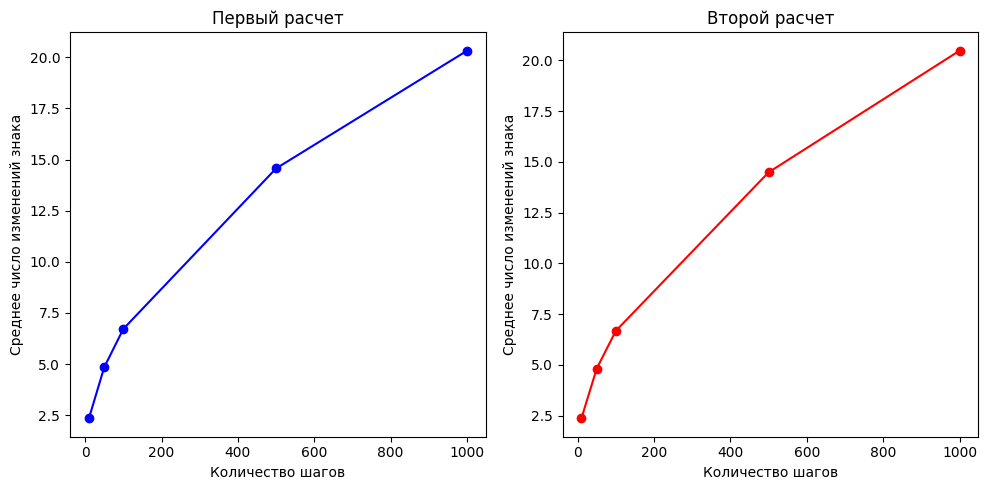

In [3118]:
first_results = [result[1] for result in sign_changes_results]
second_results = [result[1] for result in new_sign_changes_results]
# Построение графиков
plt.figure(figsize=(10, 5))

# Первый график
plt.subplot(1, 2, 1)
plt.plot(step_sizes, first_results, marker='o', color='b', label="Первый расчет")
plt.xlabel("Количество шагов")
plt.ylabel("Среднее число изменений знака")
plt.title("Первый расчет")

# Второй график
plt.subplot(1, 2, 2)
plt.plot(step_sizes, second_results, marker='o', color='r', label="Второй расчет")
plt.xlabel("Количество шагов")
plt.ylabel("Среднее число изменений знака")
plt.title("Второй расчет")

plt.tight_layout()
plt.show()

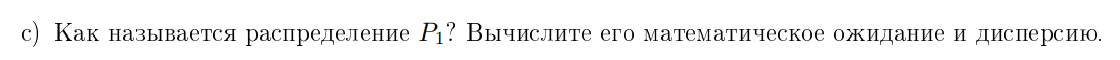


1. Так как доходность $r_t$ описывается винеровским процессом $W_t$ на интервале [0, 1], можно записать:
   $$
   r_t = W_t, \quad W_t \sim \mathcal{N}(0, t).
   $$
   Поскольку $ r_t = \ln\left(\frac{P_t}{P_0}\right) $, то можно выразить $ P_t $ через начальную цену $ P_0 $ и экспоненциальный рост:
   $ P_t = P_0 \cdot e^{W_t} $ .
   Следовательно, $$ P_1 = P_0 \cdot e^{W_1} $$ где $ W_1 \sim \mathcal{N}(0, 1)$ , что означает, что \( P_1 \) имеет *логнормальное распределение* .

2. Математическое ожидание $ P_1 $: 
   $$
   \mathbb{E}[P_1] = \mathbb{E}[P_0 \cdot e^{W_1}] = P_0 \cdot \mathbb{E}[e^{W_1}] = P_0 \cdot e^{\frac{\sigma^2}{2}}
   $$

3. Дисперсия $ P_1 $:
   $$
   \text{Var}(P_1) = \text{Var}(P_0 \cdot e^{W_1}) = P_0^2 \cdot \left(e^{\sigma^2} - 1\right) \cdot e^{\sigma^2}$$



In [3119]:

sigma = 1

# Теоретическое математическое ожидание и дисперсия для P_1
expected_P1 = P0 * np.exp(sigma / 2)
variance_P1 = (P0 ** 2) * np.exp(sigma) * (np.exp(sigma) - 1)

print(f"Теоретическое математическое ожидание P_1: {expected_P1}")
print(f"Теоретическая дисперсия P_1: {variance_P1}")


Теоретическое математическое ожидание P_1: 164.87212707001282
Теоретическая дисперсия P_1: 46707.742704716045


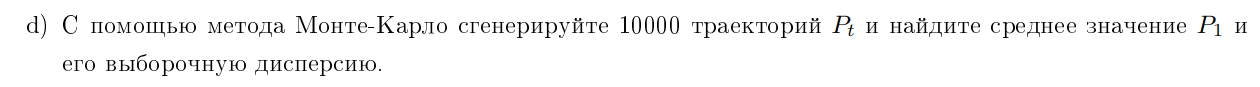

In [3120]:

# Параметры задачи
num_simulations = 10000  # Количество траекторий
num_steps = 1000         # Количество шагов на интервале [0, 1]

# Симуляция винеровского процесса для r_t
r = np.zeros((num_simulations, num_steps + 1))
for i in range(1, num_steps + 1):
    dW = np.sqrt(dt) * np.random.randn(num_simulations)
    r[:, i] = r[:, i - 1] + dW  # Модель изменения r_t как винеровского процесса

# Рассчитываем цены P_t, используя начальную цену и экспоненциальный рост
P = P0 * np.exp(r)

# Значения P_1 для каждой траектории
P_1 = P[:, -1]

# Вычисление выборочного среднего и выборочной дисперсии для P_1
mean_P1 = np.mean(P_1)
var_P1 = np.var(P_1)
print(f"Выборочное среднее P_1: {mean_P1}")
print(f"Выборочная дисперсия P_1: {var_P1}")


Выборочное среднее P_1: 165.98438525257575
Выборочная дисперсия P_1: 48483.192376990155


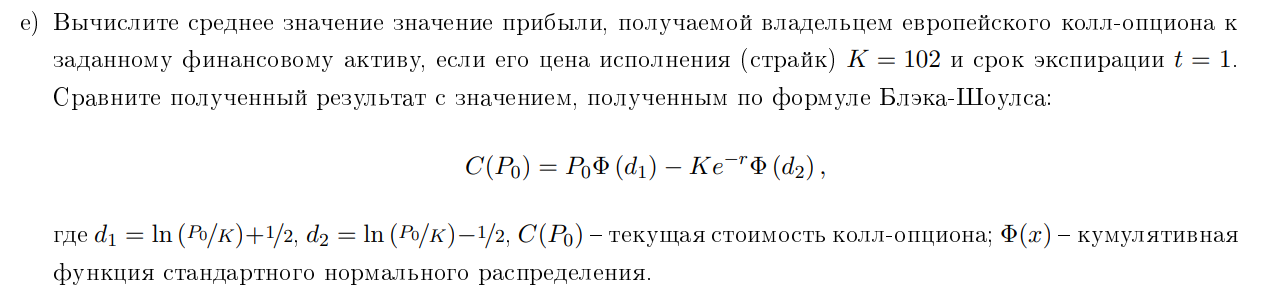


1. **Метод Монте-Карло:**

Сначала симулируем возможные значения цены актива $ P_1$ к моменту $t = 1 $ с использованием модели геометрического броуновского движения:

$$ P_1 = P_0 \cdot e^{W_1} $$

Прибыль по колл-опциону в каждой симуляции рассчитывается как:
$
\text{Payoff} = \max(P_1 - K, 0),
$
где $K = 102$— страйк опциона.


2. **Формула Блэка-Шоулза:**

Стоимость колл-опциона по формуле Блэка-Шоулза выражается как:

$C(P_0) = P_0 \Phi(d_1) - K e^{-r T} \Phi(d_2)$
где $\Phi(x) $ — кумулятивная функция распределения стандартного нормального распределения, а $d_1$ и $d_2$ можно выразить как:

$$
d_1 = \frac{\ln\left(\frac{P_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right) T}{\sigma \sqrt{T}}$$
$$
d_2 = d_1 - \sigma \sqrt{T}
$$

In [3749]:
K = 102
t = 1
# Вычисление цены актива через экспоненциальный процесс
# W_t - случайная величина (например, нормальное распределение)
W_t = np.random.normal(0, np.sqrt(t), 10000)  # для Монте-Карло
P1 = P0 * np.exp(W_t)

# Прибыль по колл-опциону для каждой симуляции
payoffs = np.maximum(P1 - K, 0)

# Средняя прибыль от колл-опциона (метод Монте-Карло)
mean_profit = np.mean(payoffs)
print(f"Средняя прибыль от колл-опциона (Монте-Карло): {mean_profit}")

# Вычисление цены колл-опциона по формуле Блэка-Шоулза
d1 = (np.log(P0 / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
d2 = d1 - sigma * np.sqrt(t)
C_black_scholes = P0 * norm.cdf(d1) - K * np.exp(-r * t) * norm.cdf(d2)

print(f"Цена колл-опциона по формуле Блэка-Шоулза: {C_black_scholes}")

Средняя прибыль от колл-опциона (Монте-Карло): 87.9352128511309
Цена колл-опциона по формуле Блэка-Шоулза: 37.68238871102574


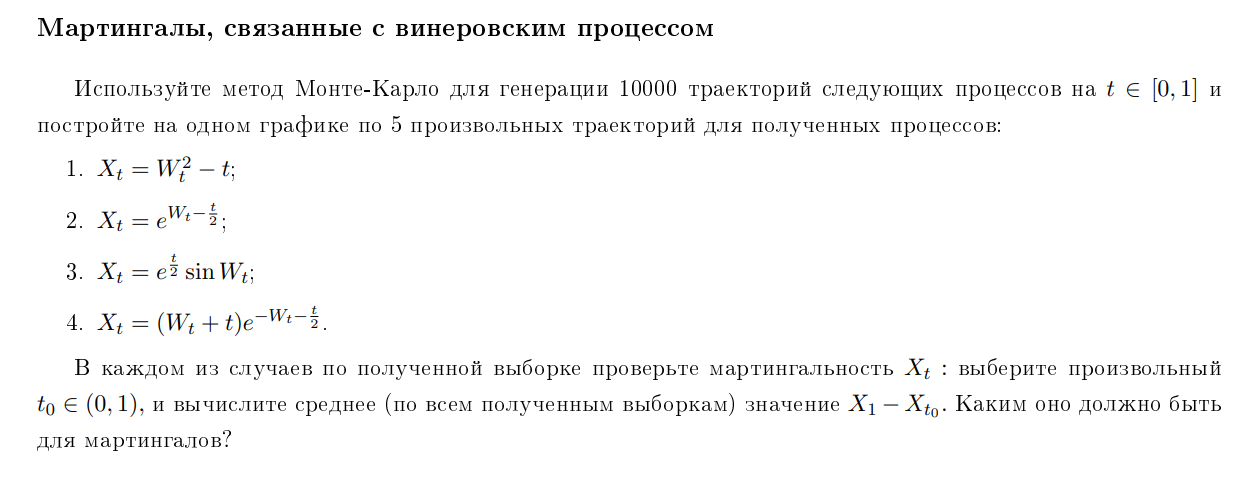

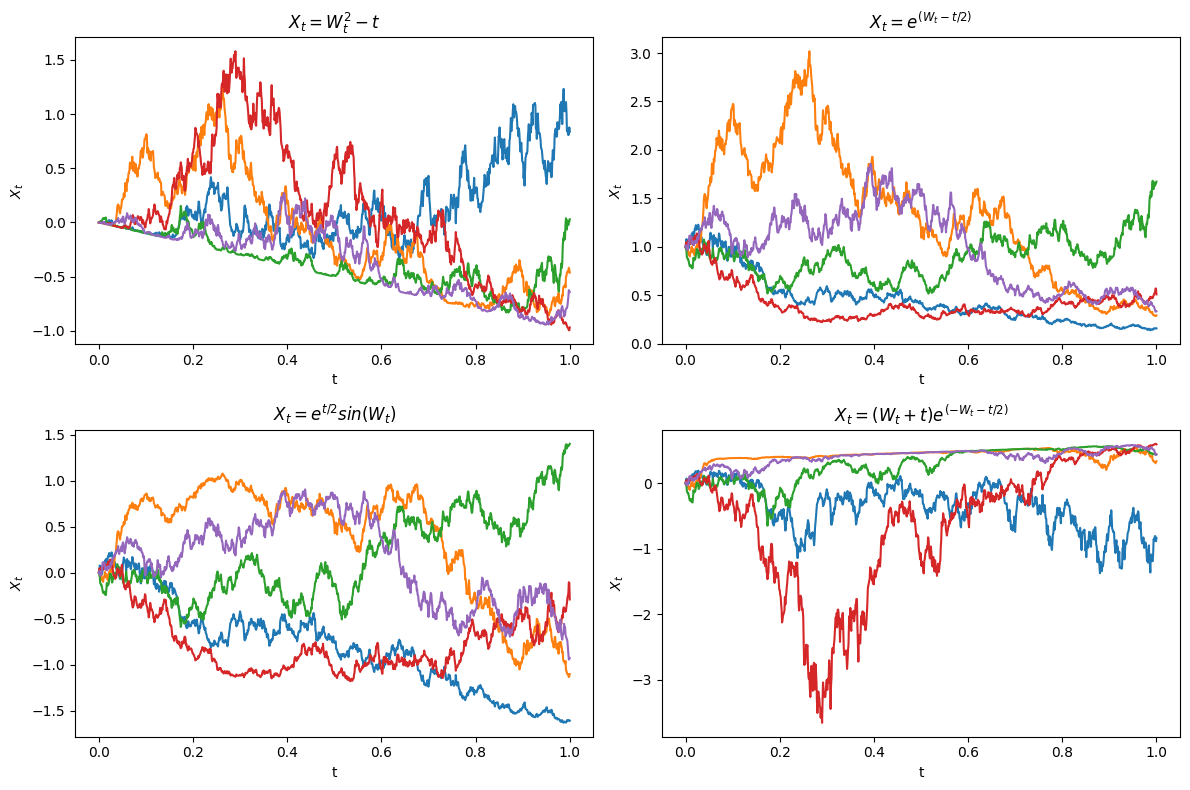

In [3122]:
# Параметры моделирования
num_simulations = 10000  # Количество траекторий
num_steps = 1000         # Количество шагов на интервале [0, 1]
T = 1                    # Конечное время
dt = T / num_steps       # Длина временного шага
t = np.linspace(0, T, num_steps + 1)  # Шаги времени

# Генерация винеровского процесса
W = np.cumsum(np.sqrt(dt) * np.random.randn(num_simulations, num_steps), axis=1)
W = np.concatenate((np.zeros((num_simulations, 1)), W), axis=1)  # добавляем начальное условие W(0) = 0

# Определение 4 процессов
X1 = W**2 - t
X2 = np.exp(W - t / 2)
X3 = np.exp(t / 2) * np.sin(W)
X4 = (W + t) * np.exp(-W - t / 2)

# Выбор 5 случайных траекторий для каждого процесса
random_indices = np.random.choice(num_simulations, 5, replace=False)

# Построение графиков
plt.figure(figsize=(12, 8))

# График для X1
plt.subplot(2, 2, 1)
for idx in random_indices:
    plt.plot(t, X1[idx, :], label=f'Траектория {idx+1}')
plt.xlabel('t')
plt.ylabel('$X_t$')
plt.title('$X_t = W_t^2 - t$')

# График для X2
plt.subplot(2, 2, 2)
for idx in random_indices:
    plt.plot(t, X2[idx, :], label=f'Траектория {idx+1}')
plt.xlabel('t')
plt.ylabel('$X_t$')
plt.title('$X_t = e^{(W_t - t/2)}$')

# График для X3
plt.subplot(2, 2, 3)
for idx in random_indices:
    plt.plot(t, X3[idx, :], label=f'Траектория {idx+1}')
plt.xlabel('t')
plt.ylabel('$X_t$')
plt.title('$X_t = e^{t/2}sin(W_t)$')

# График для X4
plt.subplot(2, 2, 4)
for idx in random_indices:
    plt.plot(t, X4[idx, :], label=f'Траектория {idx+1}')
plt.xlabel('t')
plt.ylabel('$X_t$')
plt.title('$X_t = (W_t + t) e^{(-W_t - t/2)}$')

plt.tight_layout()
plt.show();


Для проверки мартингальности процесса $X_t$, нужно проверить условие, что:
$$\mathbb{E}[X_1 - X_{t_0}] = 0$$
где $t_0 \in (0, 1) $ — случайно выбранный момент времени.

Процесс $ X_t $ называется мартингалом, если для любого $t_0 $ и $ t_1 $, таких что $ 0 \leq t_0 < t_1 $, выполняется:
$$
\mathbb{E}[X_{t_1} \mid \mathcal{F}_{t_0}] = X_{t_0}$$
где $\mathcal{F}_{t_0}$ — фильтрация, которая соответствует всем событиям, произошедшим до времени $t_0 $. В случае с методом Монте-Карло мы можем проверить мартингальность через вычисление разницы $ X_1 - X_{t_0}$ для случайного момента времени $ t_0 $.

## Проверка мартингальности

$
\text{Среднее значение для } X_1 - X_{t_0} \text{ для процесса } X1: \mathbb{E}[X_1 - X_{t_0}] \approx 0
$

Если значение близко к нулю (с точностью до заданного допуска), процесс можно считать мартингалом. В противном случае процесс не является мартингалом.



In [3752]:
# Функция для расчета мартингальности
def calculate_martingality(X, t0_idx):
    X_t0 = X[:, t0_idx]  # Значение процесса в момент времени t0
    X_1 = X[:, -1]       # Конечное значение процесса
    mean_difference = np.mean(X_1 - X_t0)
    return mean_difference

t0_idx = np.random.randint(1, num_steps)  # Случайный индекс времени t0

# Вычисление среднего для каждого процесса и сохранение результатов
results = []
for X in [X1, X2, X3, X4]:
    mean_diff = calculate_martingality(X, t0_idx)
    results.append(mean_diff)

# Вывод результатов
for i, mean_diff in enumerate(results, 1):
    print(f"Среднее значение X1 - Xt0 для процесса {i}: {mean_diff}")

Среднее значение X1 - Xt0 для процесса 1: -0.0046768573330168775
Среднее значение X1 - Xt0 для процесса 2: 0.006525798849981712
Среднее значение X1 - Xt0 для процесса 3: 0.026457585397915317
Среднее значение X1 - Xt0 для процесса 4: 0.005464716230563104


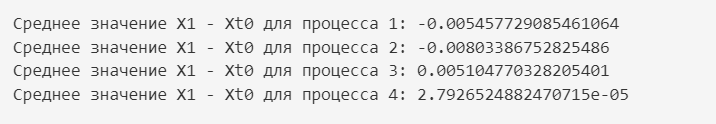 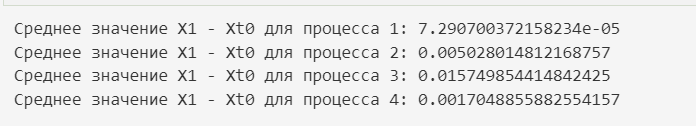 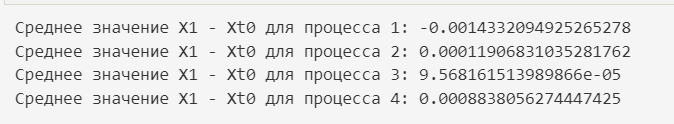 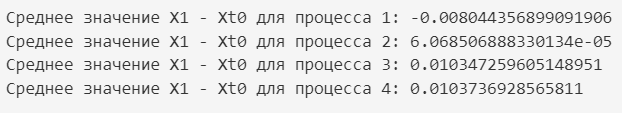


   За все попытки генерации $t_0$ у всех $X_t$ возникали слишком большие по модулю значения. Так что предполагаю, что  эти $X_t$ не являются мартингалами. Но вообще, все сильно зависит, от того, какие случайные приращения нагенерит компьютер.

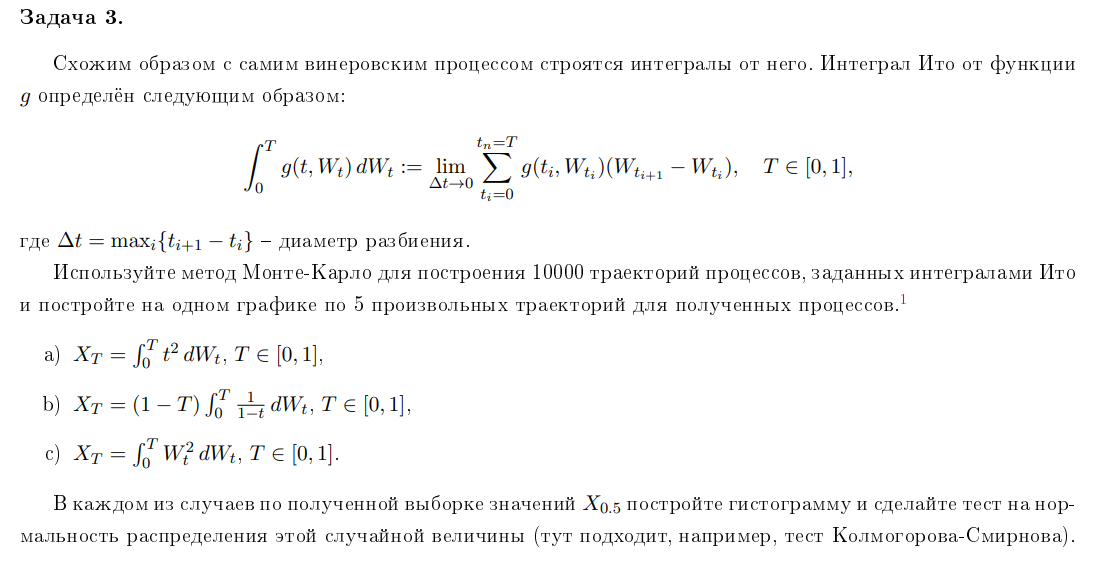

In [ ]:
# Параметры
T = 1           # конец временного интервала
n = 1000        # количество временных шагов
M = 10000       # количество траекторий
dt = T / n      # размер временного шага
time_grid = np.linspace(0, T, n+1)  # временная сетка от 0 до T

# Генерация путей винеровского процесса (Wiener process или броуновское движение)
dW = np.sqrt(dt) * np.random.randn(M, n)  # случайные приращения
W = np.cumsum(dW, axis=1)                 # накопленная сумма, чтобы получить W_t
W = np.hstack((np.zeros((M, 1)), W))      # добавляем W_0 = 0 в начало

In [3655]:
# (a) X_T = ∫_0^T t^2 dW_t
X_a = np.zeros(M)  # массив для хранения значений X_T для случая (a)
for i in range(1, n+1):
    X_a += time_grid[i]**2 * (W[:, i] - W[:, i-1])

# (b) X_T = (1 - T) ∫_0^T (1 / (1 - t)) dW_t, избегая t = 1
X_b = np.zeros(M)
for i in range(1, n):  # используем time_grid до последней точки (избегаем t=1)
    X_b += (1 / (1 - time_grid[i])) * (W[:, i] - W[:, i-1])
X_b *= (1 - T)

# (c) X_T = ∫_0^T W_t^2 dW_t
X_c = np.zeros(M)
for i in range(1, n+1):
    X_c += W[:, i-1]**2 * (W[:, i] - W[:, i-1])

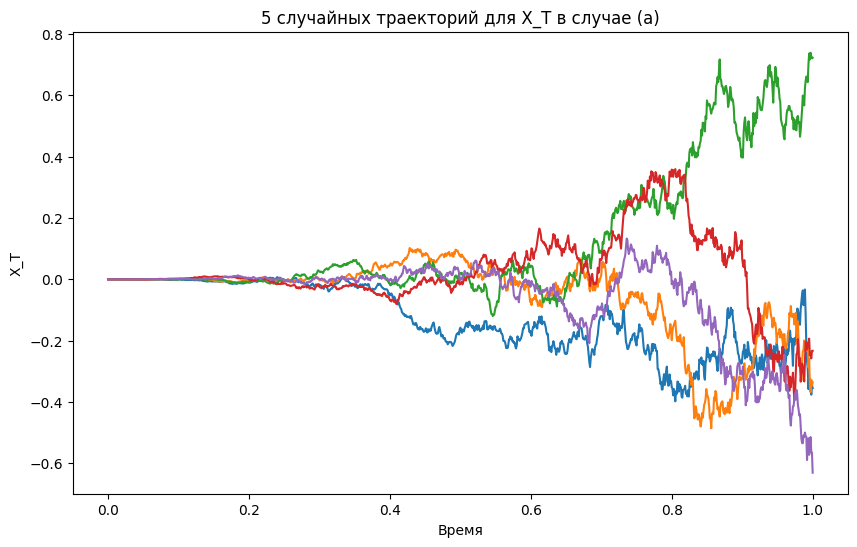

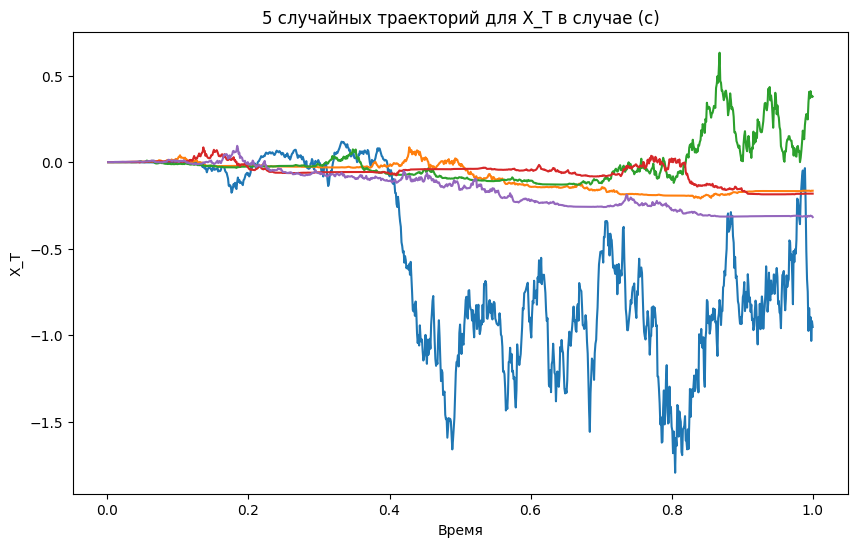

In [3756]:
# Выбираем 5 случайных индексов траекторий
sample_indices = random.sample(range(M), 5)

# Построение графиков для случая (a)
plt.figure(figsize=(10, 6))
for idx in sample_indices:
    plt.plot(time_grid, np.cumsum(time_grid**2 * np.diff(W[idx, :], prepend=0)))
plt.title('5 случайных траекторий для X_T в случае (a)')
plt.xlabel('Время')
plt.ylabel('X_T')
plt.show()

# # Построение графиков для случая (b)
# plt.figure(figsize=(10, 6))
# for idx in sample_indices:
#     # Рассчитываем траекторию X_b для каждого выбранного индекса, избегая t=1
#     X_b_traj = (1 - T) * np.cumsum((1 / (1 - time_grid[1:n])) * np.diff(W[idx, :n]))
#     plt.plot(time_grid[1:n], X_b_traj)  # Используем time_grid[1:n] для соответствия размерности X_b_traj
# plt.title('5 случайных траекторий для X_T в случае (b)')
# plt.xlabel('Время')
# plt.ylabel('X_T')
# plt.show()



# Построение графиков для случая (c)
plt.figure(figsize=(10, 6))
for idx in sample_indices:
    X_c_traj = np.cumsum(W[idx, :-1]**2 * np.diff(W[idx, :]))
    plt.plot(time_grid[1:], X_c_traj)
plt.title('5 случайных траекторий для X_T в случае (c)')
plt.xlabel('Время')
plt.ylabel('X_T')
plt.show()

Случай (a) X_{0.5} KS тест: статистика = 0.0072760021774613826 , p-значение = 0.6621357018615514


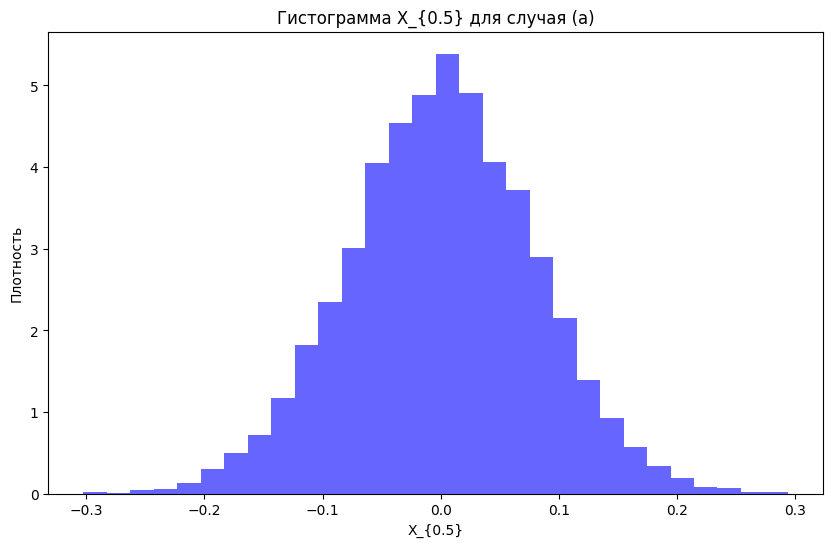

In [3753]:
# Находим индекс, соответствующий T = 0.5
half_time_index = int(0.5 * n)

# Случай (a) при T=0.5
X_a_half = np.zeros(M)
for i in range(1, half_time_index+1):
    X_a_half += time_grid[i]**2 * (W[:, i] - W[:, i-1])

plt.figure(figsize=(10, 6))
plt.hist(X_a_half, bins=30, density=True, alpha=0.6, color='b')
plt.title("Гистограмма X_{0.5} для случая (a)")
plt.xlabel("X_{0.5}")
plt.ylabel("Плотность")

# Колмогоров-Смирнов тест на нормальность
ks_stat_a, p_value_a = kstest(X_a_half, 'norm', args=(np.mean(X_a_half), np.std(X_a_half)))
print("Случай (a) X_{0.5} KS тест: статистика =", ks_stat_a, ", p-значение =", p_value_a)
plt.show()


Случай (b) X_{0.5} KS тест: статистика = 0.008284146299541995 , p-значение = 0.49607243098296394


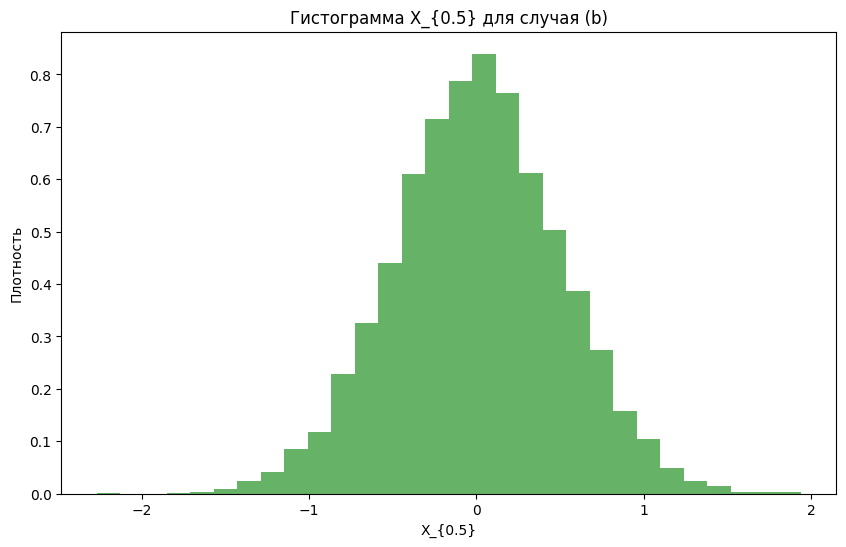

In [3754]:
# Случай (b) при T=0.5
X_b_half = np.zeros(M)
for i in range(1, half_time_index+1):
    X_b_half += (1 / (1 - time_grid[i])) * (W[:, i] - W[:, i-1])
X_b_half *= (1 - 0.5)

plt.figure(figsize=(10, 6))
plt.hist(X_b_half, bins=30, density=True, alpha=0.6, color='g')
plt.title("Гистограмма X_{0.5} для случая (b)")
plt.xlabel("X_{0.5}")
plt.ylabel("Плотность")

# Колмогоров-Смирнов тест на нормальность
ks_stat_b, p_value_b = kstest(X_b_half, 'norm', args=(np.mean(X_b_half), np.std(X_b_half)))
print("Случай (b) X_{0.5} KS тест: статистика =", ks_stat_b, ", p-значение =", p_value_b)
plt.show()

Случай (c) X_{0.5} KS тест: статистика = 0.19728685055456835 , p-значение = 0.0


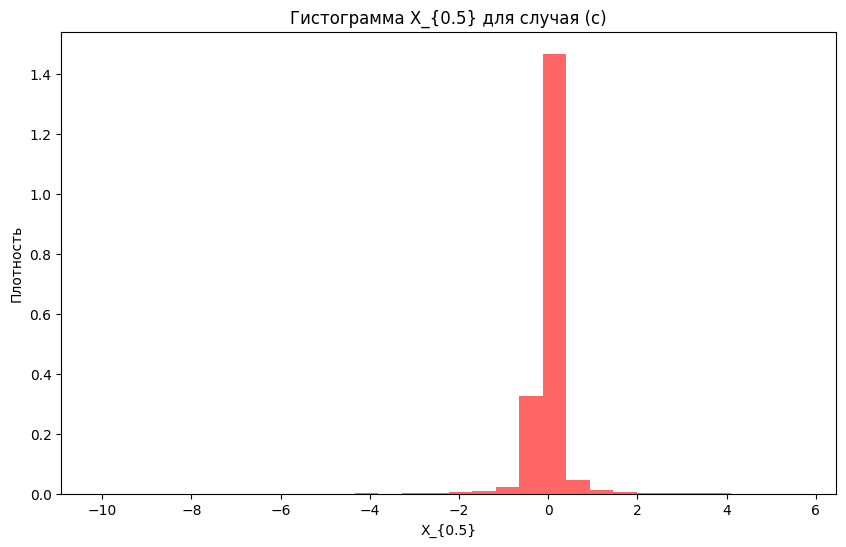

In [3755]:

# Случай (c) при T=0.5
X_c_half = np.zeros(M)
for i in range(1, half_time_index+1):
    X_c_half += W[:, i-1]**2 * (W[:, i] - W[:, i-1])

plt.figure(figsize=(10, 6))
plt.hist(X_c_half, bins=30, density=True, alpha=0.6, color='r')
plt.title("Гистограмма X_{0.5} для случая (c)")
plt.xlabel("X_{0.5}")
plt.ylabel("Плотность")

# Колмогоров-Смирнов тест на нормальность
ks_stat_c, p_value_c = kstest(X_c_half, 'norm', args=(np.mean(X_c_half), np.std(X_c_half)))
print("Случай (c) X_{0.5} KS тест: статистика =", ks_stat_c, ", p-значение =", p_value_c)
plt.show()